In [1]:
import xlwings as xw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [2]:
book = xw.Book("D:\\OneDrive\\文档\\hushen300.xlsx")
book.name

'hushen300.xlsx'

In [3]:
book.sheets

Sheets([<Sheet [hushen300.xlsx]预测值分析>, <Sheet [hushen300.xlsx]指数合理性判断>])

In [4]:
sheet1 = book.sheets['预测值分析']
sheet2 = book.sheets['指数合理性判断']

In [5]:
df1 = sheet1["A1"].expand().options(pd.DataFrame, index=True).value
df1

,收盘价
日期,
2014-10-31,2508.0
2014-11-30,2808.0
2014-12-31,3533.0
2015-01-31,3434.0
2015-02-28,3572.0
...,...
2024-05-31,3579.0
2024-06-30,3461.0
2024-07-31,3442.0


In [6]:
df1.index

DatetimeIndex(['2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31',
               ...
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
               '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
               '2024-08-31', '2024-09-27'],
              dtype='datetime64[ns]', name='日期', length=120, freq=None)

In [7]:
df1.columns

Index(['收盘价'], dtype='object')

In [8]:
df1.dtypes

收盘价    float64
dtype: object

In [9]:
from pywander.math.excel import to_excel_int_time_v

print(to_excel_int_time_v(df1.index.to_pydatetime()))

[41943 41973 42004 42035 42063 42094 42124 42155 42185 42216 42247 42277
 42308 42338 42369 42400 42429 42460 42490 42521 42551 42582 42613 42643
 42674 42704 42735 42766 42794 42825 42855 42886 42916 42947 42978 43008
 43039 43069 43100 43131 43159 43190 43220 43251 43281 43312 43343 43373
 43404 43434 43465 43496 43524 43555 43585 43616 43646 43677 43708 43738
 43769 43799 43830 43861 43890 43921 43951 43982 44012 44043 44074 44104
 44135 44165 44196 44227 44255 44286 44316 44347 44377 44408 44439 44469
 44500 44530 44561 44592 44620 44651 44681 44712 44742 44773 44804 44834
 44865 44895 44926 44957 44985 45016 45046 45077 45107 45138 45169 45199
 45230 45260 45291 45322 45351 45382 45412 45443 45473 45504 45535 45562]


In [10]:

df1['int_time'] = to_excel_int_time_v(df1.index.to_pydatetime())
df1

,收盘价,int_time
日期,,
2014-10-31,2508.0,41943
2014-11-30,2808.0,41973
2014-12-31,3533.0,42004
2015-01-31,3434.0,42035
2015-02-28,3572.0,42063
...,...,...
2024-05-31,3579.0,45443
2024-06-30,3461.0,45473
2024-07-31,3442.0,45504


In [11]:
df1['收盘价'].to_numpy()

array([2508., 2808., 3533., 3434., 3572., 4051., 4749., 4840., 4473.,
       3816., 3366., 3202., 3534., 3566., 3731., 2946., 2877., 3218.,
       3156., 3169., 3153., 3203., 3327., 3253., 3336., 3538., 3310.,
       3387., 3452., 3456., 3439., 3492., 3666., 3737., 3822., 3836.,
       4006., 4006., 4030., 4275., 4023., 3898., 3756., 3802., 3510.,
       3517., 3334., 3438., 3153., 3172., 3010., 3201., 3669., 3872.,
       3913., 3629., 3825., 3835., 3799., 3814., 3886., 3828., 4096.,
       4003., 3940., 3686., 3912., 3867., 4163., 4695., 4816., 4587.,
       4695., 4960., 5211., 5351., 5336., 5048., 5123., 5331., 5224.,
       4811., 4805., 4866., 4908., 4832., 4940., 4563., 4581., 4222.,
       4016., 4091., 4485., 4170., 4078., 3804., 3508., 3853., 3871.,
       4156., 4069., 4050., 4029., 3798., 3842., 4014., 3765., 3689.,
       3572., 3496., 3431., 3215., 3516., 3537., 3604., 3579., 3461.,
       3442., 3321., 3703.])

In [12]:
df1['int_time'].to_numpy()

array([41943, 41973, 42004, 42035, 42063, 42094, 42124, 42155, 42185,
       42216, 42247, 42277, 42308, 42338, 42369, 42400, 42429, 42460,
       42490, 42521, 42551, 42582, 42613, 42643, 42674, 42704, 42735,
       42766, 42794, 42825, 42855, 42886, 42916, 42947, 42978, 43008,
       43039, 43069, 43100, 43131, 43159, 43190, 43220, 43251, 43281,
       43312, 43343, 43373, 43404, 43434, 43465, 43496, 43524, 43555,
       43585, 43616, 43646, 43677, 43708, 43738, 43769, 43799, 43830,
       43861, 43890, 43921, 43951, 43982, 44012, 44043, 44074, 44104,
       44135, 44165, 44196, 44227, 44255, 44286, 44316, 44347, 44377,
       44408, 44439, 44469, 44500, 44530, 44561, 44592, 44620, 44651,
       44681, 44712, 44742, 44773, 44804, 44834, 44865, 44895, 44926,
       44957, 44985, 45016, 45046, 45077, 45107, 45138, 45169, 45199,
       45230, 45260, 45291, 45322, 45351, 45382, 45412, 45443, 45473,
       45504, 45535, 45562])

[5.33408309e+02 4.53415839e-01]
[[ 9.03222589e+04 -3.85970571e+01]
 [-3.85970571e+01  1.65030097e-02]]


0.1004588657297747

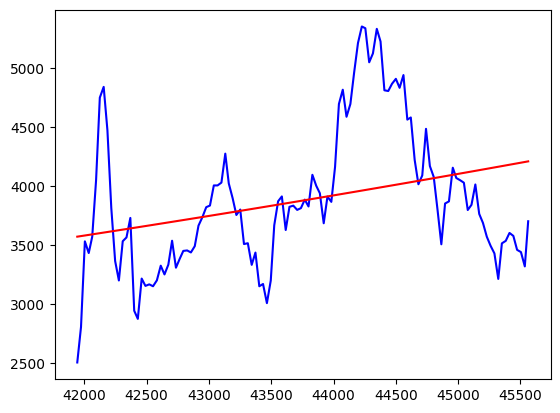

In [13]:
xdata = df1['int_time'].to_numpy()
ydata = df1['收盘价'].to_numpy()
xdata = xdata.astype(np.float64)

def func(x, a, b):
    # 因为np.exp接受过大的数会造成数值溢出 
    # 必须先改造输入xdata 让其变得小一些
    return a * np.exp(b * (x * 0.0001))

fitting_opts = {
    #'maxfev': 10,  # 设置最大迭代次数
    #'method': 'lm'
}

popt, pcov = curve_fit(func, xdata, ydata , **fitting_opts)
print(popt)
print(pcov)

# 实际曲线
plt.plot(xdata, ydata, 'b-', label='data')

# 预测曲线
predict_ydata = func(xdata, *popt)
plt.plot(xdata, predict_ydata, 'r-')

r2_score(ydata, predict_ydata)

In [14]:
book.names['Var_1'].delete()
book.names['Var_2'].delete()

In [15]:
book.names.add("Var_1", popt[0])
book.names.add("Var_2", popt[1])
print(book.names)

[<Name 'Var_1': =533.408308983806>, <Name 'Var_2': =0.453415839253049>]


In [16]:
book.save()
#app = book.app
#%app.quit()